<a href="https://colab.research.google.com/github/nhaandq/AI_project-Face/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import pickle
from os import listdir
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.preprocessing.image import  img_to_array
from google.colab.patches import cv2_imshow
from keras.utils.np_utils import to_categorical
#from tensorflow.keras.optimizers import SGD

In [ ]:
"""
Nhận diện khuôn mặt bản thân 30-60 tấm, size 150x150
chương trình kết quả dữ liệu hình ảnh => github, kaggle
"""


'\nNhận diện khuôn mặt bản thân 30-60 tấm, size 150x150\nchương trình kết quả dữ liệu hình ảnh => github, kaggle\n'

In [ ]:
raw_folder = '/content/drive/MyDrive/Face/Training_data/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = []
y = []
classes = ['0000','0001']

In [ ]:
i=0

for folder in classes:
  print("Folder=",folder)
  for file in listdir(raw_folder + folder):
    print("File=", file)
    X.append(cv.resize(cv.imread(raw_folder+ folder +"/" +file, cv.IMREAD_COLOR),dsize=(150,150)))
    y.append(i)

  i+=1

Folder= 0000
File= 0 (1).jpg
File= 0 (10).jpg
File= 0 (100).jpg
File= 0 (102).jpg
File= 0 (106).jpg
File= 0 (11).jpg
File= 0 (12).jpg
File= 0 (13).jpg
File= 0 (14).jpg
File= 0 (15).jpg
File= 0 (16).jpg
File= 0 (17).jpg
File= 0 (18).jpg
File= 0 (19).jpg
File= 0 (2).jpg
File= 0 (20).jpg
File= 0 (21).jpg
File= 0 (22).jpg
File= 0 (223).jpg
File= 0 (23).jpg
File= 0 (24).jpg
File= 0 (25).jpg
File= 0 (27).jpg
File= 0 (26).jpg
File= 0 (28).jpg
File= 0 (29).jpg
File= 0 (3).jpg
File= 0 (30).jpg
File= 0 (32).jpg
File= 0 (31).jpg
File= 0 (35).jpg
File= 0 (34).jpg
File= 0 (33).jpg
File= 0 (38).jpg
File= 0 (36).jpg
File= 0 (37).jpg
File= 0 (4).jpg
File= 0 (39).jpg
File= 0 (40).jpg
File= 0 (41).jpg
File= 0 (43).jpg
File= 0 (42).jpg
File= 0 (46).jpg
File= 0 (44).jpg
File= 0 (45).jpg
File= 0 (47).jpg
File= 0 (49).jpg
File= 0 (48).jpg
File= 0 (5).jpg
File= 0 (53).jpg
File= 0 (52).jpg
File= 0 (51).jpg
File= 0 (50).jpg
File= 0 (55).jpg
File= 0 (54).jpg
File= 0 (6).jpg
File= 0 (60).jpg
File= 0 (58).jpg
Fil

In [ ]:
X = np.array(X)
y = np.array(y)
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# Tạo tệp TrainTest trong GDrive, sau đó lưu dữ liệu X,y và0
file = open('/content/drive/MyDrive/Face/TrainTest', 'wb')
pickle.dump((X,y), file)
file.close()

In [ ]:
# Load X, y từ file TrainTest
file = open('/content/drive/MyDrive/Face/TrainTest', 'rb')
(X, y) = pickle.load(file)
file.close()

print(X.shape)
print(y.shape)
print(classes)

(500, 150, 150, 3)
(500, 1)
['0000', '0001']


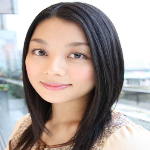

[0]
0000


In [ ]:
cv2_imshow(cv.resize(X[1],dsize=(150,150)))
print(y[1])
print(classes[y[1][0]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 150, 150, 3)
(400, 2)
(100, 150, 150, 3)
(100, 2)


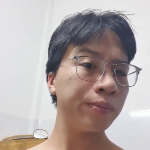

[0. 1.]
0001


In [ ]:
cv2_imshow(X_train[110])
print(y_train[110])
print(classes[np.argmax(y_train[110])])

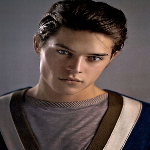

[1. 0.]
0000


In [ ]:
cv2_imshow(X_test[20])
print(y_test[20])
print(classes[np.argmax(y_test[20])])

In [ ]:
X_train1 = X_train.astype('float32')
X_test1 = X_test.astype('float32')

In [112]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3) ) )
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

In [113]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
  rescale=1./255, width_shift_range=0.1, height_shift_range=0.1,
	horizontal_flip=True, brightness_range=[0.2,1.5], fill_mode="nearest")

In [114]:
filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [115]:
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(aug.flow(X_train1, y_train, batch_size=64), epochs=20, 
                          validation_data=aug.flow(X_test1,y_test,batch_size=len(X_test1)),
                          callbacks=callbacks_list,verbose = 1)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 4.4969 - accuracy: 0.6175
Epoch 1: val_accuracy improved from -inf to 0.78000, saving model to weights-01-0.78.hdf5
7/7 [==============================] - 38s 5s/step - loss: 4.4969 - accuracy: 0.6175 - val_loss: 1.2342 - val_accuracy: 0.7800
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.7925
Epoch 2: val_accuracy improved from 0.78000 to 0.79000, saving model to weights-02-0.79.hdf5
7/7 [==============================] - 36s 5s/step - loss: 0.7199 - accuracy: 0.7925 - val_loss: 0.4867 - val_accuracy: 0.7900
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.4211 - accuracy: 0.8275
Epoch 3: val_accuracy improved from 0.79000 to 0.88000, saving model to weights-03-0.88.hdf5
7/7 [==============================] - 40s 6s/step - loss: 0.4211 - accuracy: 0.8275 - val_loss: 0.3237 - val_accuracy: 0.8800
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 0

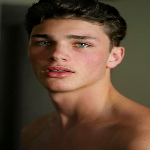

100.0 % 0000
0.0 % 0001
Đây không phải tôi


In [122]:
img = cv.imread('/content/drive/MyDrive/Face/Test/0.jpg', cv.IMREAD_COLOR)
img = cv.resize(img,dsize=(150,150))
cv2_imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
if classes[np.argmax(predict)]=='0000':
  print('Đây không phải tôi')
elif classes[np.argmax(predict)]=='0001':
  print('Đây là tôi')

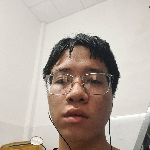

37.629 % 0000
62.371 % 0001
Đây là tôi


In [123]:
img = cv.imread('/content/drive/MyDrive/Face/Test/1.jpg', cv.IMREAD_COLOR)
img = cv.resize(img,dsize=(150,150))
cv2_imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
if classes[np.argmax(predict)]=='0000':
  print('Đây không phải tôi')
elif classes[np.argmax(predict)]=='0001':
  print('Đây là tôi')